In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import joblib

In [2]:
df_letters = pd.read_csv("/home/jyothir-dr/Downloads/eng1/train2.csv")

In [3]:
df_letters.head()

,filepaths,Font
0,./Font/Font/Sample060/img060-00761.png,x
1,./Font/Font/Sample060/img060-00103.png,x
2,./Font/Font/Sample060/img060-00344.png,x
3,./Font/Font/Sample060/img060-00049.png,x
4,./Font/Font/Sample060/img060-00421.png,x


In [4]:
df_letters.values[1][0], df_letters.values[1][1]

('./Font/Font/Sample060/img060-00103.png', 'x')

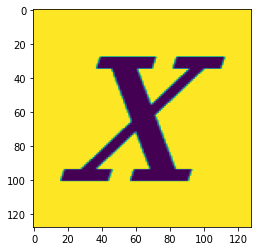

In [5]:
im = cv2.imread(str(df_letters.values[1][0]), 0)
plt.imshow(im)
plt.show()


In [6]:
X_train2split = df_letters['filepaths']
Y_train2split = df_letters['Font']

In [7]:
df_letters.count(axis = 0), df_letters.isnull().sum()

(filepaths    62992
 Font         62992
 dtype: int64,
 filepaths    0
 Font         0
 dtype: int64)

In [8]:
xx = df_letters['Font'].value_counts()
print(xx[:])

O    2032
x    1016
w    1016
M    1016
W    1016
     ... 
I    1016
B    1016
K    1016
s    1016
n    1016
Name: Font, Length: 61, dtype: int64


In [9]:
df_letters['Font'].unique()

array(['x', 'D', 'A', 'e', 'O', 'm', '9', 'G', 'V', '4', 'X', 'U', '2',
       '8', '1', 'p', 'Y', 'H', '3', 'J', 'y', 'S', 'Z', 'k', 'T', 'I',
       'B', 'K', 's', 'E', 'd', 'q', 'u', 'M', 'W', '6', 'a', 'v', 't',
       'P', 'j', 'Q', 'o', 'h', 'g', 'b', 'w', 'c', 'f', 'R', '7', 'N',
       'L', 'F', 'i', 'C', 'z', 'l', '5', 'r', 'n'], dtype=object)

In [10]:
def load_data(paths):
    data = []
    labels = []
    
    for i in range(len(paths)):
        img = cv2.imread(paths.values[i][0], 0).astype(np.float32)
        img = cv2.resize(img,(64,64))
        label = paths.values[i][1]
        data.append(img/255.0)
        labels.append(label)
    data2 = np.asarray(data, np.float32)
    return data2, labels

def disp_img(data, label, i):
    # im = cv2.imread(data[i])
    plt.imshow(data[i])
    print("label:", label[i])

In [11]:
X_train2split, Y_train2split = load_data(df_letters)

In [12]:
# compute required values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

label: A


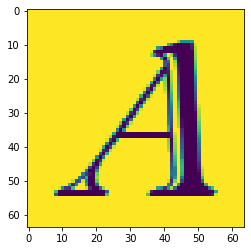

In [13]:
disp_img (X_train2split, Y_train2split, 2078)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train2split, Y_train2split, test_size=0.2, random_state=48)

In [15]:
y_train, y_val

(['L',
  'T',
  'D',
  'x',
  'T',
  'c',
  '8',
  'W',
  'V',
  'm',
  '7',
  'c',
  '4',
  '8',
  'c',
  'u',
  '7',
  'P',
  'j',
  'e',
  '5',
  '2',
  '7',
  'm',
  '9',
  'i',
  'p',
  'c',
  'O',
  'D',
  'J',
  '6',
  'A',
  'r',
  'E',
  'l',
  'r',
  'w',
  'k',
  'X',
  '4',
  'S',
  'C',
  'N',
  'M',
  '8',
  'O',
  'Q',
  'p',
  's',
  'U',
  'Z',
  'M',
  'K',
  'Q',
  'k',
  'f',
  'N',
  '3',
  'd',
  'n',
  'b',
  'G',
  '9',
  't',
  'X',
  'X',
  'S',
  '8',
  'O',
  'T',
  'J',
  'r',
  'c',
  'H',
  'E',
  's',
  'b',
  'q',
  'v',
  'S',
  'd',
  'P',
  'O',
  'c',
  'T',
  'l',
  'x',
  'w',
  'u',
  '9',
  'f',
  'J',
  '9',
  'c',
  'A',
  'u',
  'w',
  'o',
  'X',
  'N',
  '9',
  'C',
  'Z',
  'g',
  '8',
  'p',
  'b',
  '4',
  '6',
  'i',
  'N',
  'e',
  'W',
  'M',
  'y',
  'L',
  'i',
  '1',
  'r',
  'Q',
  'n',
  'S',
  'e',
  '5',
  'p',
  '2',
  'a',
  'T',
  'b',
  'q',
  '2',
  '3',
  'l',
  'O',
  'P',
  'b',
  'd',
  'w',
  'B',
  'i',
  'i',
  '5',

label: v


(None, (64, 64))

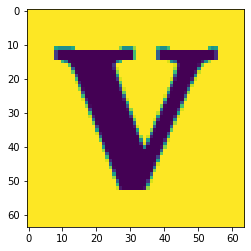

In [16]:
disp_img(X_val, y_val, 1955), X_val[0].shape

In [17]:
y_train_unique, y_train_counts = np.unique(y_train, return_counts=True)
y_train_dist = dict(zip(y_train_unique, y_train_counts))

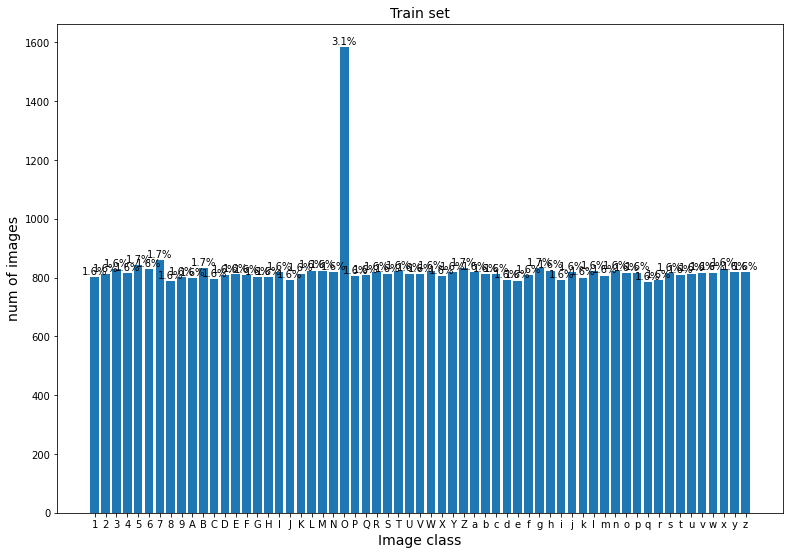

In [18]:
fig, ax = plt.subplots(figsize =(13, 9))
ax.bar(list(y_train_dist.keys()), list(y_train_dist.values()))

for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(X_train):.1f}%\n'
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_height()
    ax.annotate(percentage, (_x, _y), ha='center', va='center')
    
plt.title("Train set", size=14)
plt.xlabel("Image class", size=14)
plt.xticks(list(y_train_dist.keys()))
plt.ylabel("num of images", size=14)

plt.show()

In [19]:
X_train.shape, X_val.shape

((50393, 64, 64), (12599, 64, 64))

In [20]:
width = 64
height = 64
X_train = X_train.reshape(-1, width * height)
X_val = X_val.reshape(-1, width * height)

In [21]:
# model = scaler.fit(X_train)
# X_train = model.transform(X_train)
# model = scaler.fit(X_val)
# X_val = model.transform(X_val)

In [22]:
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
import time
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline


In [23]:

# euclidean', 'infinity', 'l1', 'l2', 'manhattan', 'minkowski',

In [24]:
# knn = KNeighborsClassifier(n_neighbors = 1)
knn = KNeighborsClassifier(n_neighbors=1,  metric='minkowski')

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
tic = time.time()
y_pred = knn.predict(X_val)
toc = time.time()
cost_time = toc-tic
print("{:d} no of images in {:.1f}.".format(len(X_val), cost_time))
acc = accuracy_score(y_val, y_pred)
print("Accuracy fo the model of {} nn is {}".format(knn.n_neighbors, round(acc, 3)))

12599 no of images in 77.5.
Accuracy fo the model of 1 nn is 0.883


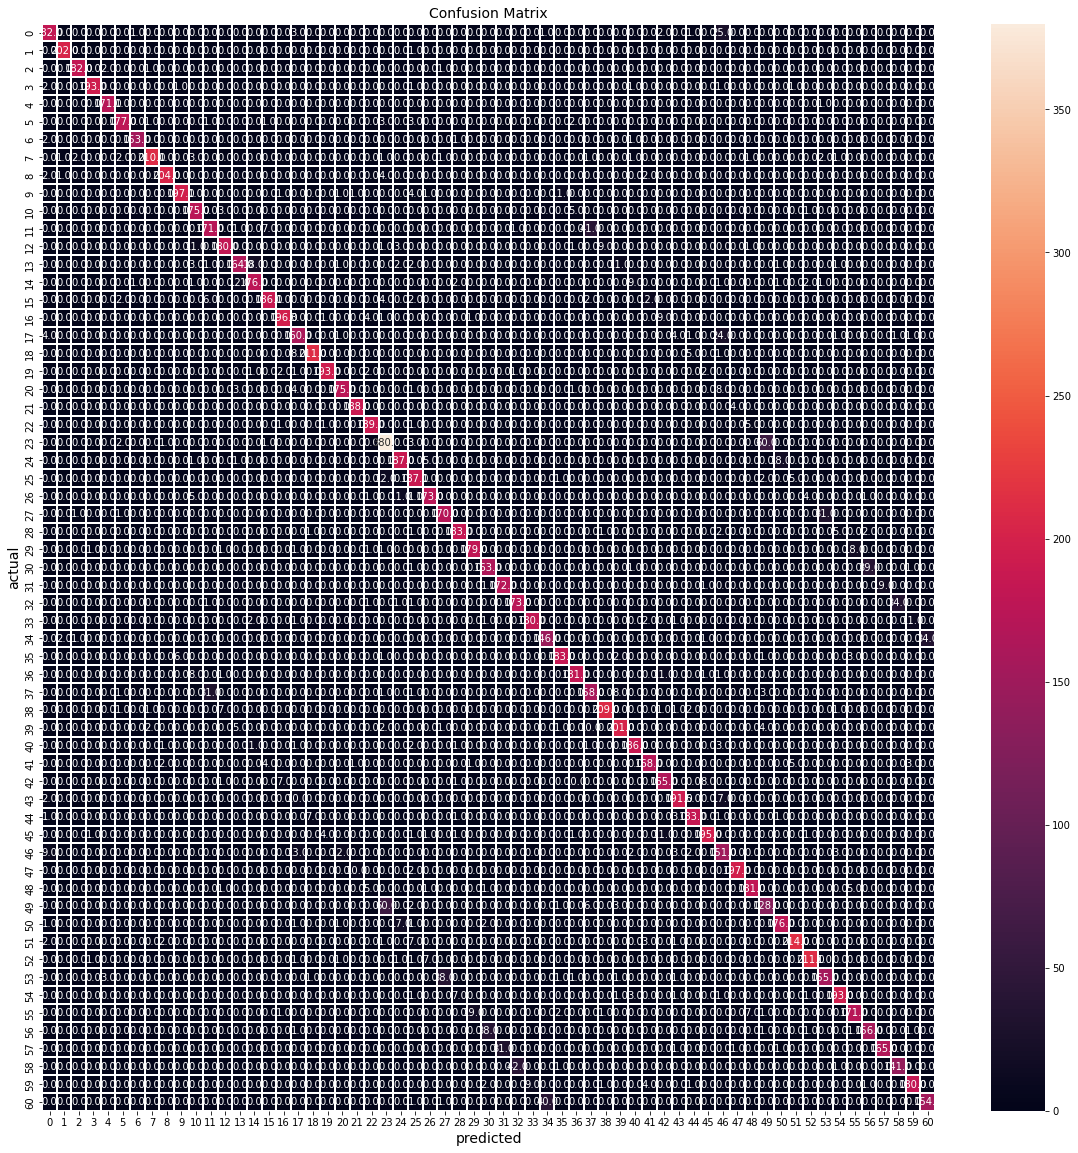

In [27]:
confusion_mat = confusion_matrix(y_val, y_pred)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(confusion_mat, annot=True, linewidths=0.1, fmt='.1f', ax=ax)
plt.xlabel('predicted', size=14)
plt.ylabel('actual', size=14)
plt.title('Confusion Matrix', size=14)
plt.show()

In [28]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.85      0.86       215
           2       0.98      1.00      0.99       203
           3       0.98      0.98      0.98       186
           4       0.98      0.96      0.97       200
           5       0.97      0.99      0.98       173
           6       0.95      0.94      0.94       188
           7       0.99      0.97      0.98       157
           8       0.98      0.93      0.95       227
           9       0.97      0.96      0.96       213
           A       0.97      0.91      0.94       217
           B       0.84      0.95      0.89       184
           C       0.81      0.77      0.79       221
           D       0.93      0.87      0.90       206
           E       0.88      0.80      0.84       204
           F       0.85      0.85      0.85       206
           G       0.93      0.87      0.90       215
           H       0.94      0.91      0.92       215
           I       0.77    

In [32]:
import pickle
knnPickle = open('model_test', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)  

In [39]:
import pickle
import cv2
import numpy as np
# load the model 
model = pickle.load(open('model_test', 'rb'))
# result = model.predict(X_val) 

In [34]:
# print(result)

['U' 'W' 'G' ... 'S' 'D' 'p']


In [40]:
# Read the input image
# /home/jyothir-dr/Downloads/eng1/Font/Font/Sample001/img001-00002.png
im_gray = cv2.imread("/home/jyothir-dr/Downloads/eng1/Font/Font/Sample001/img001-00002.png", 0)
# Convert to grayscale
# im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Threshold the image in order to find contours
ret, im_th = cv2.threshold(im_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# im_th = cv2.resize(im_th,(64,64)) #.astype(np.float32)

# cv2.imshow("thresh", im_th)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [41]:
# Find contours in the image
ctrs, hier = cv2.findContours(im_th, cv2.RETR_TREE,
                                 cv2.CHAIN_APPROX_SIMPLE)

bboxes=[cv2.boundingRect(c) for c in ctrs]
sorted_bboxes = sorted(bboxes, key=lambda b:b[0])

In [42]:
sorted_bboxes

[(0, 0, 128, 128), (40, 15, 49, 98), (55, 29, 19, 70)]

In [44]:
for num, i_bboxes in enumerate(sorted_bboxes):
    [x,y,w,h]=i_bboxes
    if w>50:
        # Make the rectangular region around the digit
        cv2.rectangle(im_gray,(x,y),(x+w,y+h), (0,255,0), 1)
        roi = im_gray[y:y+h,x:x+w]
        roi = cv2.resize(roi,(64,64)).astype(np.float32)
        roi = roi/255.0
        print("shape:", roi.shape)
        result = model.predict(roi)
        print("prediction:", result)
        cv2.imshow(str(num), roi)
        cv2.waitKey()
cv2.destroyAllWindows()


shape: (64, 64)


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 64 while Y.shape[1] == 4096

In [40]:
# from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier()
# knn_params = {
#     "n_neighbors": np.arange(1, 3),                                   
#     'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
#     'metric': ['minkowski', 'euclidean']
# }
# knn_model = GridSearchCV(knn, knn_params, cv=5).fit(X_train, y_train)   


In [41]:
# print("Best Score {}".format(knn_model.best_score_))
# print("best params: {}".format(knn_model.best_params_))

In [42]:
# knn_best = KNeighborsClassifier(knn_model.best_params_["n_neighbors"])
# knn_best.fit(X_train, y_train)
# y_pred = knn_best.predict(X_val)

# acc = accuracy_score(y_val, y_pred)
# print("Accuracy fo the model of {} nn is {}".format(knn_best.n_neighbors, round(acc, 3)))